In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('fake reviews dataset.csv')
print(data.head())
print(data.isnull().sum())
print(data.describe())

             category  rating label  \
0  Home_and_Kitchen_5     5.0    CG   
1  Home_and_Kitchen_5     5.0    CG   
2  Home_and_Kitchen_5     5.0    CG   
3  Home_and_Kitchen_5     1.0    CG   
4  Home_and_Kitchen_5     5.0    CG   

                                         review_text  
0  Love this!  Well made, sturdy, and very comfor...  
1  love it, a great upgrade from the original.  I...  
2  This pillow saved my back. I love the look and...  
3  Missing information on how to use it, but it i...  
4  Very nice set. Good quality. We have had the s...  
category       0
rating         0
label          0
review_text    0
dtype: int64
             rating
count  40432.000000
mean       4.256579
std        1.144354
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   category     40432 non-null  object 
 1   rating       40432 non-null  float64
 2   label        40432 non-null  object 
 3   review_text  40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
def count_label(df, column_name, value):
  return (df[column_name] == value).sum()


OR = 'OR'
CG = 'CG'
count = count_label(data, 'label', OR)
count = count_label(data, 'label', CG)
print(f"The value '{OR}' appears {count} times in the 'label' column.")
print(f"The value '{CG}' appears {count} times in the 'label' column.")

The value 'OR' appears 20216 times in the 'label' column.
The value 'CG' appears 20216 times in the 'label' column.


In [ ]:
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text
data['review_text'] = data['review_text'].apply(preprocess_text)
X = data['review_text']
y = data['label']

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy: 0.90
              precision    recall  f1-score   support

          CG       0.90      0.89      0.90      4016
          OR       0.90      0.91      0.90      4071

    accuracy                           0.90      8087
   macro avg       0.90      0.90      0.90      8087
weighted avg       0.90      0.90      0.90      8087



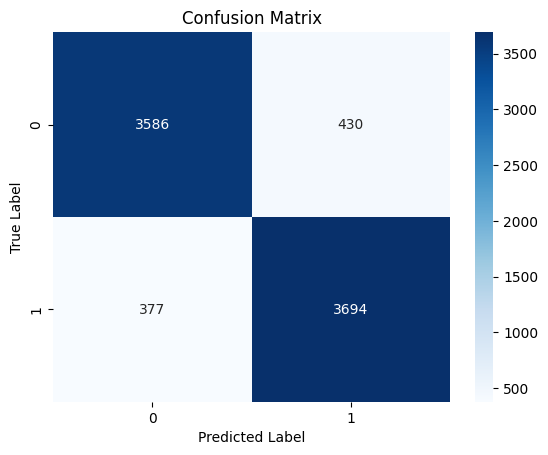

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Naive Bayes
import re
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

X = data['review_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb = GaussianNB()
nb.fit(X_train_tfidf.toarray(), y_train)
y_pred = nb.predict(X_test_tfidf.toarray())

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7714850995424756


Accuracy: 0.77
              precision    recall  f1-score   support

          CG       0.72      0.88      0.79      4016
          OR       0.84      0.67      0.75      4071

    accuracy                           0.77      8087
   macro avg       0.78      0.77      0.77      8087
weighted avg       0.78      0.77      0.77      8087



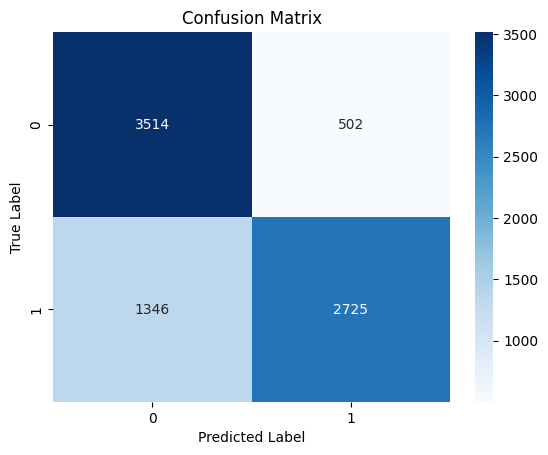

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Decision Trees
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

X = data['review_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

dtree = DecisionTreeClassifier()
dtree.fit(X_train_tfidf, y_train)
y_pred = dtree.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7541733646593298


Accuracy: 0.75
              precision    recall  f1-score   support

          CG       0.75      0.76      0.75      4016
          OR       0.76      0.75      0.75      4071

    accuracy                           0.75      8087
   macro avg       0.75      0.75      0.75      8087
weighted avg       0.75      0.75      0.75      8087



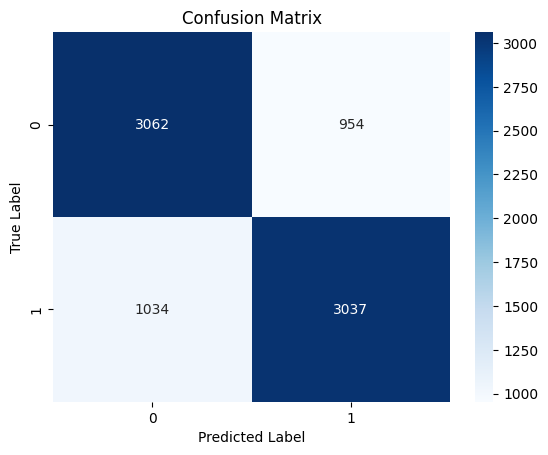

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

X = data['review_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train_tfidf, y_train)
y_pred = rforest.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8795597873129715


Accuracy: 0.88
              precision    recall  f1-score   support

          CG       0.87      0.89      0.88      4016
          OR       0.89      0.87      0.88      4071

    accuracy                           0.88      8087
   macro avg       0.88      0.88      0.88      8087
weighted avg       0.88      0.88      0.88      8087



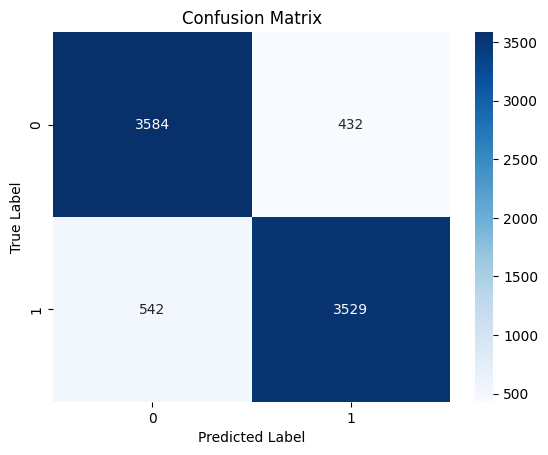

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#KNN(K-Nearest Neighbors)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

X = data['review_text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

knn.fit(X_train_tfidf, y_train)
y_pred = knn.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4977123778904414


Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



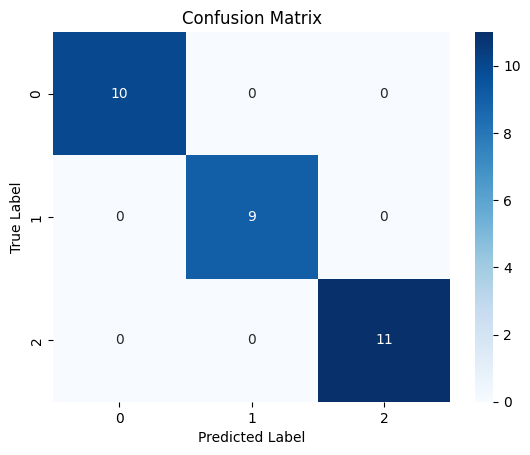

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

accuracies = {}

for name, model in models.items():
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    X_tfidf = tfidf_vectorizer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
    X_train = X_train.toarray()
    X_test = X_test.toarray()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

print("\nModel Accuracy Comparison:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

Logistic Regression Accuracy: 0.9002
Naive Bayes Accuracy: 0.7754
Decision Tree Accuracy: 0.7521
Random Forest Accuracy: 0.8825
KNN Accuracy: 0.4972

Model Accuracy Comparison:
Logistic Regression: 0.9002
Naive Bayes: 0.7754
Decision Tree: 0.7521
Random Forest: 0.8825
KNN: 0.4972
